## Tree

### sklearn.tree

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, tree
import warnings
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use(['seaborn', 'seaborn-talk'])

warnings.filterwarnings('ignore')

### Генерация данных

In [2]:
classification_problem = datasets.make_classification(n_features=2, n_informative=2,
                                                      n_classes=3, n_redundant=0,
                                                      n_clusters_per_class=1, random_state=3)

In [3]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

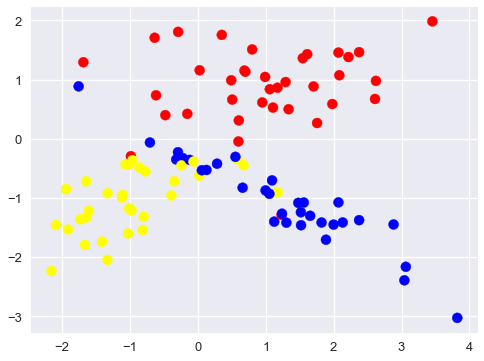

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(*classification_problem[0].T, c=classification_problem[1], cmap=colors, s =100)
plt.show()

In [5]:
train_data, test_data, train_label, test_label = model_selection.train_test_split(classification_problem[0],
                                                                                  classification_problem[1],
                                                                                  test_size=0.3, random_state=1)

### Model DecisionTreeClassifier

In [6]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_label)


DecisionTreeClassifier(random_state=1)

In [7]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_label, predictions)

0.7666666666666667

### Разделяющая поверхность

In [14]:
def get_meshgrid(data, step=.05, border=.5):
    x_min, x_max = data[:, 0].min() - border, data[:,0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:,1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(estimator, train_data, train_label, test_data, test_label,
                          colors=colors, light_colors=light_colors):

    # fit
    estimator.fit(train_data, train_label)

    plt.figure(figsize=(16, 6))

    # plot decision surface on train data
    plt.subplot(1, 2, 1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_label, s=100, cmap=colors)
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_label, estimator.predict(train_data))))

    # plot decision surface on test data
    plt.subplot(1, 2, 2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label, s=100, cmap=colors)
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_label, estimator.predict(test_data))))

    plt.show()

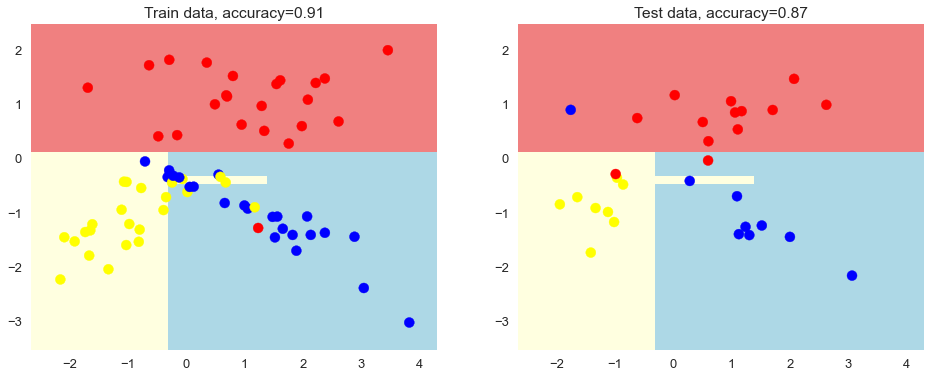

In [19]:
estimator = tree.DecisionTreeClassifier(random_state=1, min_samples_leaf=3, max_depth=5)
plot_decision_surface(estimator, train_data, train_label, test_data, test_label)
